<a href="https://colab.research.google.com/github/albertorekena/education-improvement/blob/master/Pruebas_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',33)

#Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# K-Means clustering algorithm
from sklearn.cluster import KMeans


# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Keep everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

#Inertia
from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
#df_mat = pd.read_pickle('df_mat.pkl')

#df_mat.head()


df_mat = pd.read_csv('student-mat.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## G3 

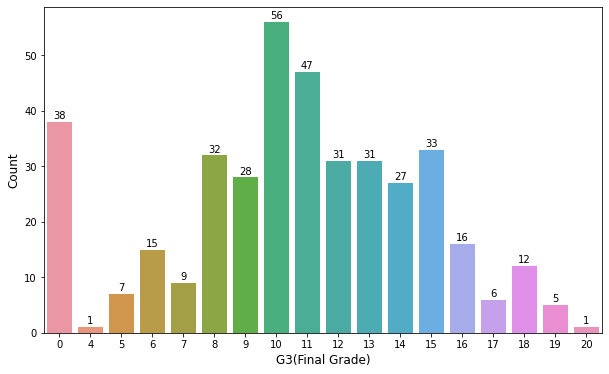

In [3]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [4]:
df_mat['G3'].value_counts().sort_index(ascending = False)

20     1
19     5
18    12
17     6
16    16
15    33
14    27
13    31
12    31
11    47
10    56
9     28
8     32
7      9
6     15
5      7
4      1
0     38
Name: G3, dtype: int64

In [5]:
print('The Median of G3(Final Grade) is: {}'.format(round(df_mat['G3'].median(),2)))
print('The Mean of G3(Final Grade) is: {}'.format(round(df_mat['G3'].mean(),2)))

The Median of G3(Final Grade) is: 11.0
The Mean of G3(Final Grade) is: 10.42


In [6]:
df_mat['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

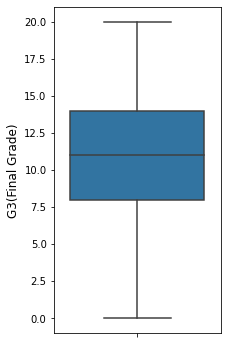

In [7]:
plt.figure(figsize = (3,6))
sns.boxplot(df_mat['G3'],orient = 'v')
plt.ylabel('G3(Final Grade)',fontsize = 12);

## school

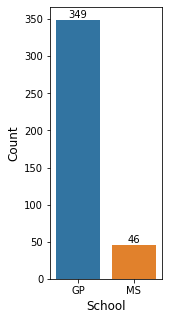

In [8]:
plt.figure(figsize = (2,5))
ax = sns.countplot(df_mat['school'])
plt.xlabel('School',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 3,p.get_height(),ha = 'center')

## Influencia de la Localización del Domicilio

In [9]:
df_mat_place = df_mat[['school','address','traveltime','G3']]

df_mat_place.head()

,school,address,traveltime,G3
0,GP,U,2,6
1,GP,U,1,6
2,GP,U,1,10
3,GP,U,1,15
4,GP,U,1,10


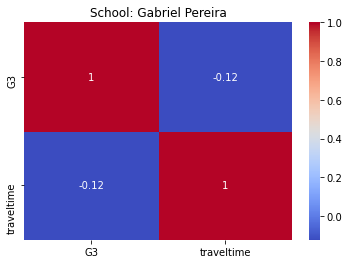

In [10]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'GP'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Gabriel Pereira');

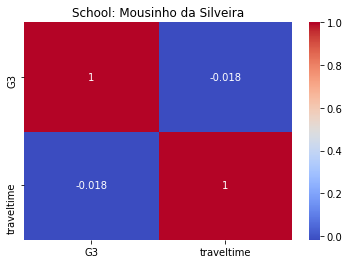

In [11]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'MS'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Mousinho da Silveira');

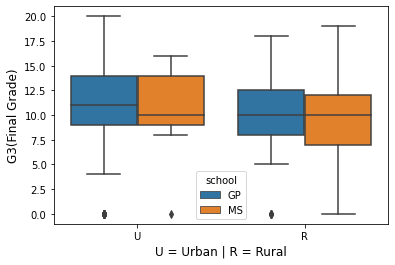

In [12]:
sns.boxplot(data = df_mat_place,x = 'address',y = 'G3',hue = 'school')
plt.xlabel('U = Urban | R = Rural',fontsize = 12)
plt.ylabel('G3(Final Grade)',fontsize = 12);

## A partir de aquí

In [0]:
df_mat_histograms = df_mat.drop('G3',axis = 1)

In [14]:
df_mat.shape

(395, 33)

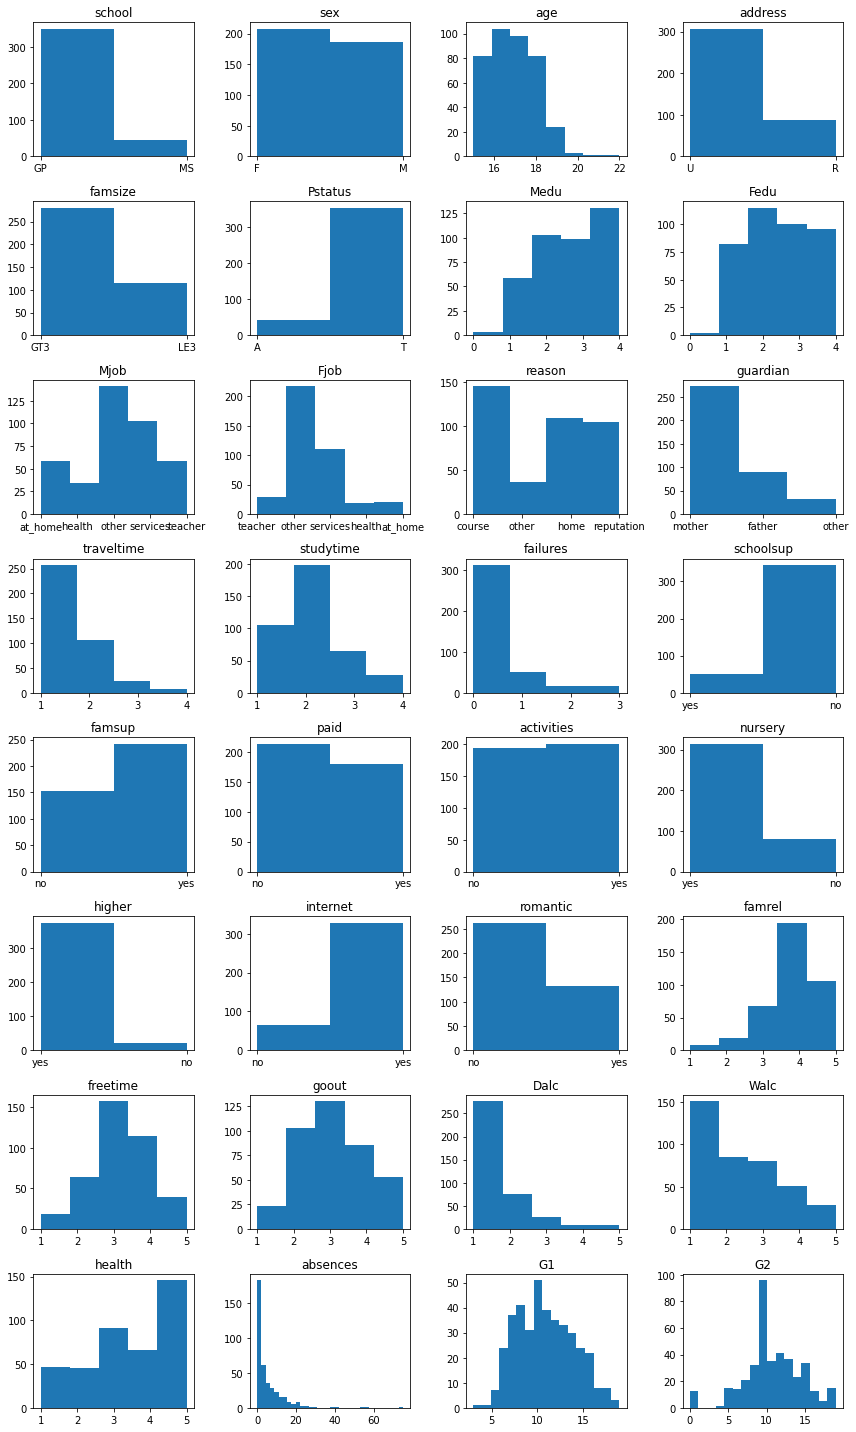

In [15]:
fig = plt.figure(figsize = (12,20))
for i in range(1,df_mat_histograms.shape[1] + 1):
    plt.subplot(8,4,i)
    ax = plt.gca()
    ax.set_title(df_mat_histograms.columns[i - 1],fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = len(df_mat_histograms.iloc[:,i - 1].unique())
    plt.hist(df_mat_histograms.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();

In [16]:
df_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
df_mat['school'] = df_mat['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_mat['sex'] = df_mat['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_mat['address'] = df_mat['address'].apply(lambda x: 1 if x == 'U' else 0)
df_mat['famsize'] = df_mat['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_mat['Pstatus'] = df_mat['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [0]:
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_mat[v] = df_mat[v].apply(lambda x: 1 if x == 'yes' else 0)

In [19]:
df_mat.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [20]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


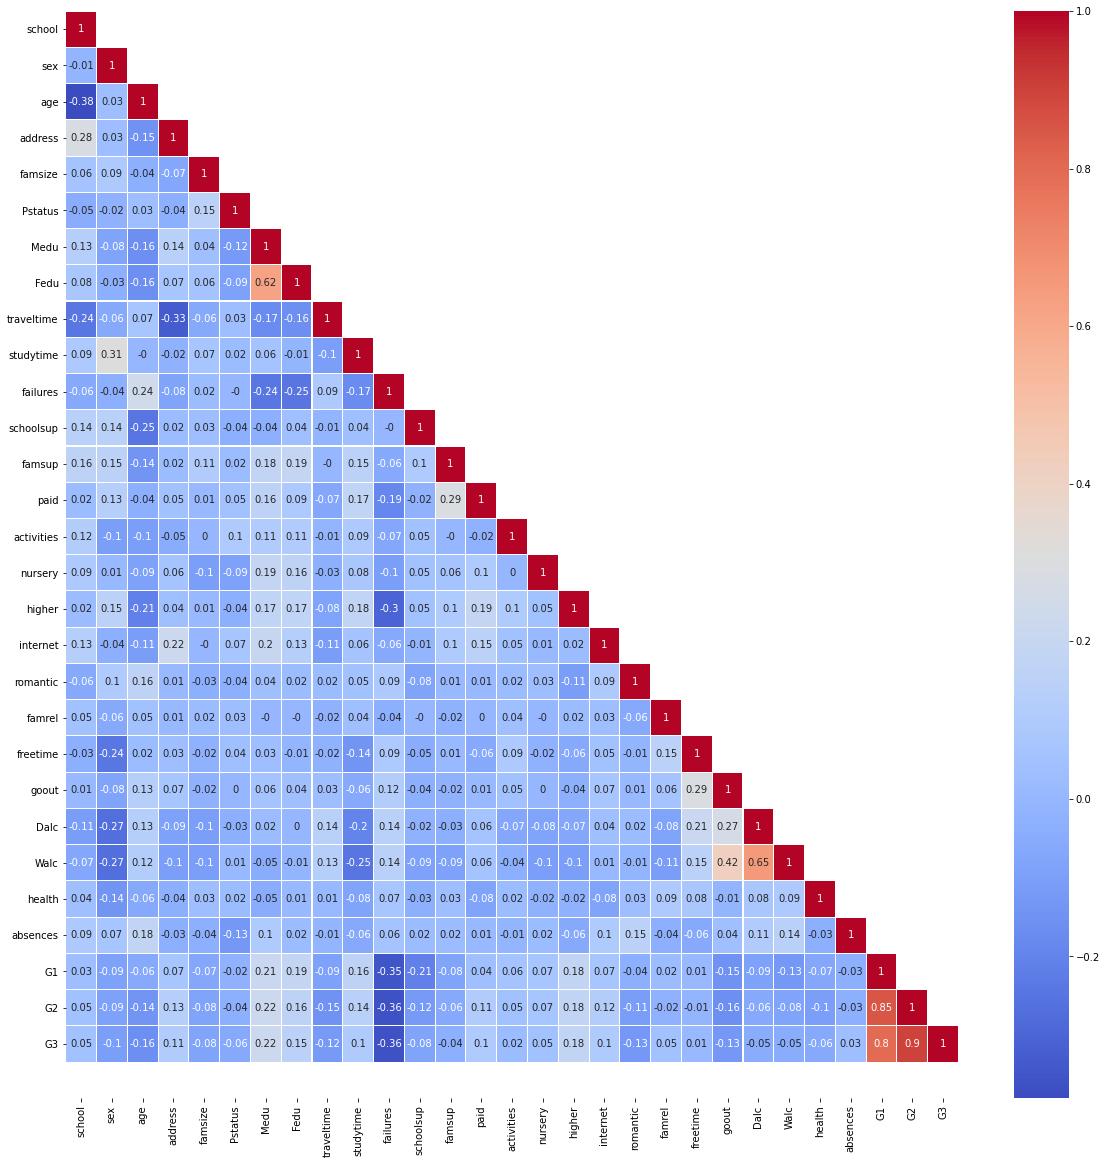

In [21]:
df_corr = df_mat.corr().round(2)

mask = np.ones(df_corr.shape,dtype = bool)
mask[np.tril_indices_from(mask)] = False

f,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(df_corr,mask = mask,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([30,0]);

In [0]:
categorical_feats = df_mat.dtypes[df_mat.dtypes == 'object'].index
df_corr = df_mat.drop(categorical_feats,axis = 1)

In [0]:
def print_correlation_table(df_corr, variable):
    correlation_abs = round(df_corr.corr()[variable].abs(),2)
    correlation_type = df_corr.corr()[variable].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
    correlation = pd.concat([correlation_abs,correlation_type],axis = 1,keys = ['correlation','type'])
    correlation = correlation.sort_values('correlation',ascending = False)
    return correlation

In [24]:
print_correlation_table(df_corr, 'G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg
goout,0.13,Neg


In [25]:
df_mat["guardian"].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [0]:
one_hot_Mjob = pd.get_dummies(df_mat['Mjob'])

In [27]:
one_hot_Mjob

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
390,0,0,0,1,0
391,0,0,0,1,0
392,0,0,1,0,0
393,0,0,0,1,0


In [0]:
#for i in ["at_home", "health", "other", "services", "teacher"]:
#    print(one_hot_Mjob[i].value_counts())

In [0]:
one_hot_Mjob = one_hot_Mjob.drop(columns = "health")

In [0]:
one_hot_Mjob = one_hot_Mjob.rename(columns={"at_home": "Mjob_at_home", "other": "Mjob_other", "services": "Mjob_services", "teacher": "Mjob_teacher"})

In [31]:
one_hot_Mjob

,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
390,0,0,1,0
391,0,0,1,0
392,0,1,0,0
393,0,0,1,0


In [32]:
df_mat_temp = pd.concat([df_mat, one_hot_Mjob], axis=1)

df_mat_temp.drop(columns = "Mjob")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher
0,1,1,18,1,1,0,4,4,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0
1,1,1,17,1,1,1,1,1,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0
2,1,1,15,1,0,1,1,1,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0
3,1,1,15,1,1,1,4,2,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0
4,1,1,16,1,1,1,3,3,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0,0,1,0
391,0,0,17,1,0,1,3,1,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,0
392,0,0,21,0,1,1,1,1,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0,1,0,0
393,0,0,18,0,0,1,3,2,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,0


In [0]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


In [0]:
df_mat_one_hot = one_hot(df_mat, ["Mjob", "Fjob", "reason", "guardian"])
#quitar columnas originales (categóricas)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob", "Fjob", "reason", "guardian"])
#quitar una columna de one hot de cada una de las variables para reducir la colinearidad (hace falta ver 
#cuál se quiere quitar en cada caso)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob_health", "Fjob_health", "guardian_other", "reason_other"])

In [35]:
df_mat_one_hot

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,0,0,1,0,0,1,0,0,0,1


In [36]:
#print_correlation_table(df_mat_one_hot, 'Mjob_at_home')
#print_correlation_table(df_mat_one_hot, 'Mjob_other')
#print_correlation_table(df_mat_one_hot, 'Mjob_services')
#print_correlation_table(df_mat_one_hot, 'Mjob_teacher')
print_correlation_table(df_mat_one_hot, 'G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg
goout,0.13,Neg


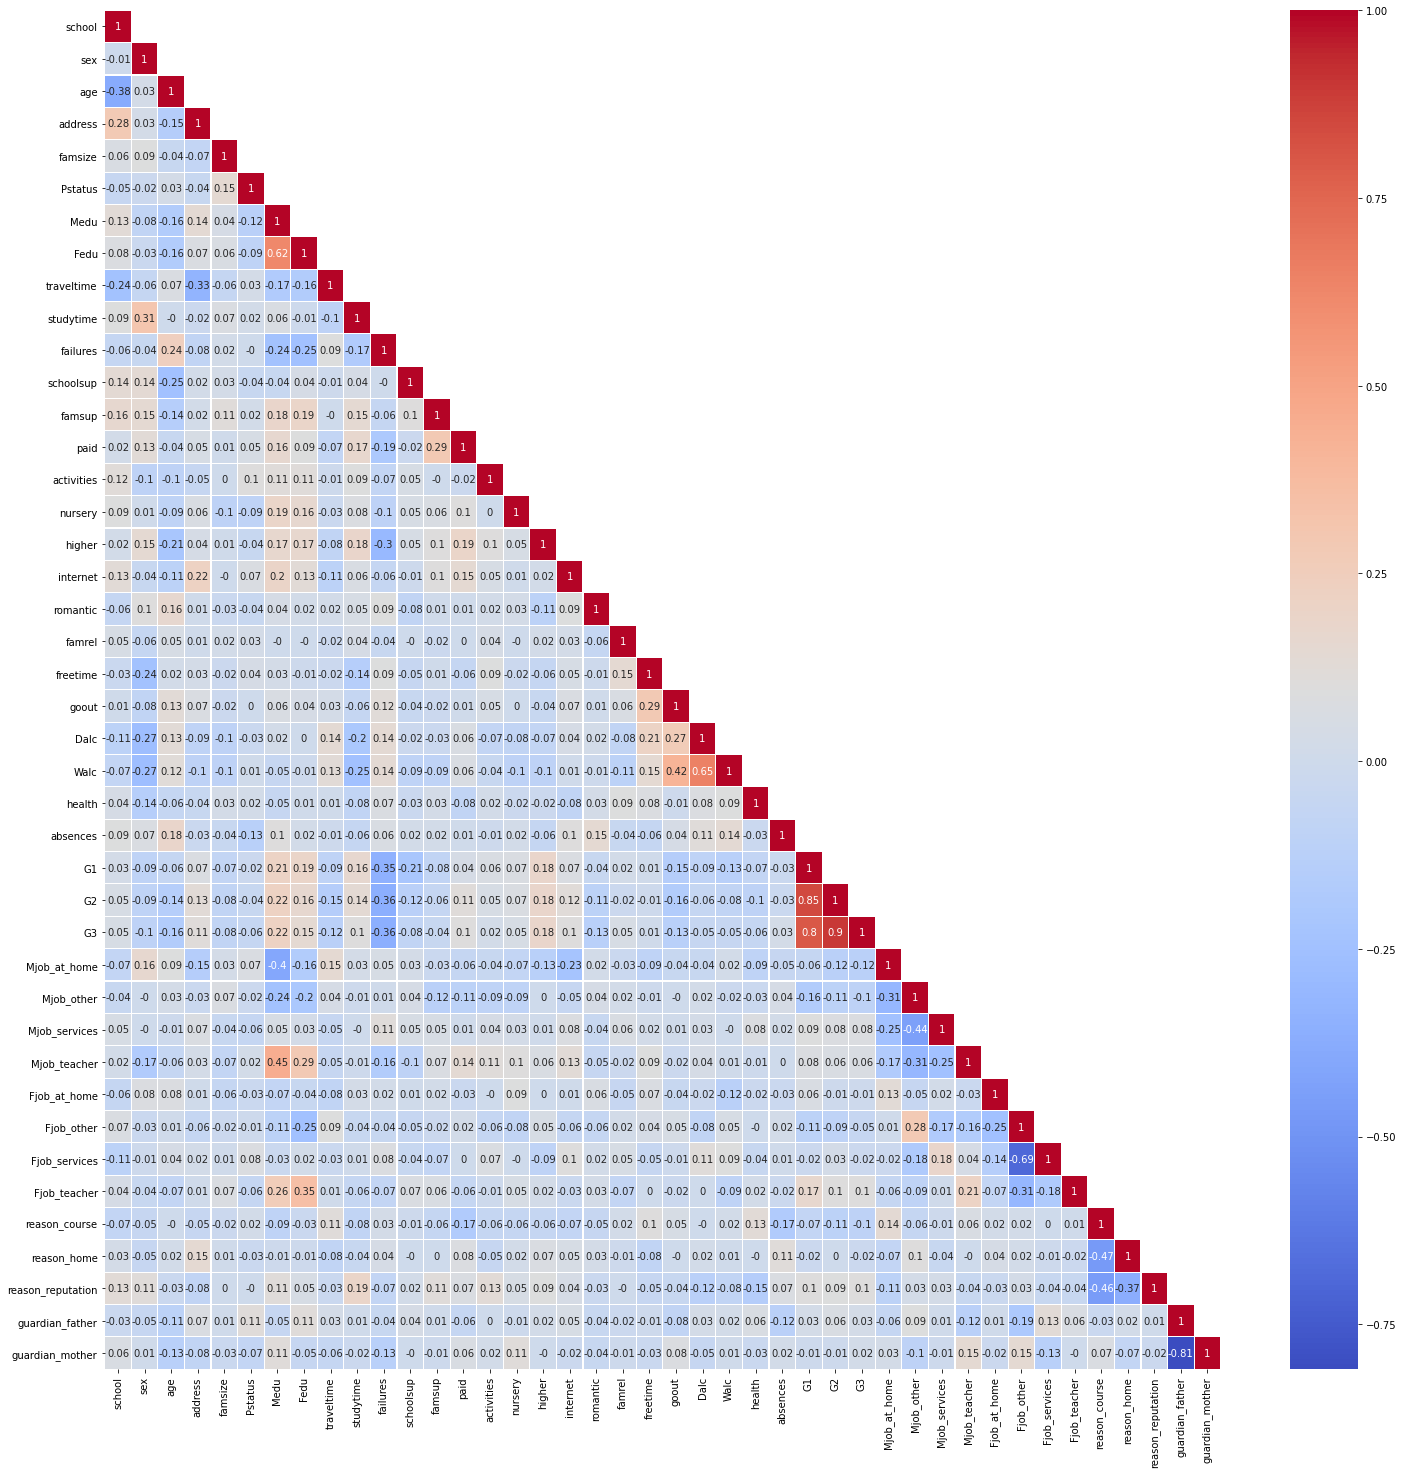

In [37]:
df_corr_oh = df_mat_one_hot.corr().round(2)


mask_oh = np.ones(df_corr_oh.shape,dtype = bool)
mask_oh[np.tril_indices_from(mask_oh)] = False



f,ax = plt.subplots(figsize = (25,25))
ax = sns.heatmap(df_corr_oh,mask = mask_oh,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([42,0]);

In [38]:
df_mat["Fjob"].value_counts(normalize = True)

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64

In [39]:
df_mat_one_hot.shape

(395, 42)

In [0]:
df_mat_one_hot = df_mat_one_hot.drop(columns = ["G1", "G2"])

In [41]:
df_mat_one_hot.drop(columns = ["G3"]).columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother'],
      dtype='object')

In [42]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = df_mat_one_hot.drop(columns = ["G3"]).columns
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              51.28
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   9.30e-105
Time:                        10:50:03   Log-Likelihood:                         -881.70
No. Observations:                 316   AIC:                                      1841.
Df Residuals:                     277   BIC:                                      1988.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [43]:
model1.get_prediction(exog = X_test).summary()

AttributeError: ignored

In [44]:
# Get predictions for the test data
y_pred_test = model1.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 4.298


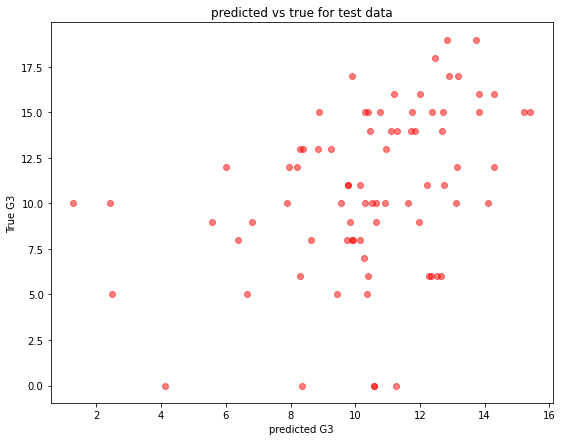

In [45]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.show();

In [0]:
df_mat_comparison = df_mat_one_hot

In [47]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              216.2
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   3.22e-127
Time:                        10:50:15   Log-Likelihood:                         -899.61
No. Observations:                 316   AIC:                                      1817.
Df Residuals:                     307   BIC:                                      1851.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

root mean squared error on test data: 4.298


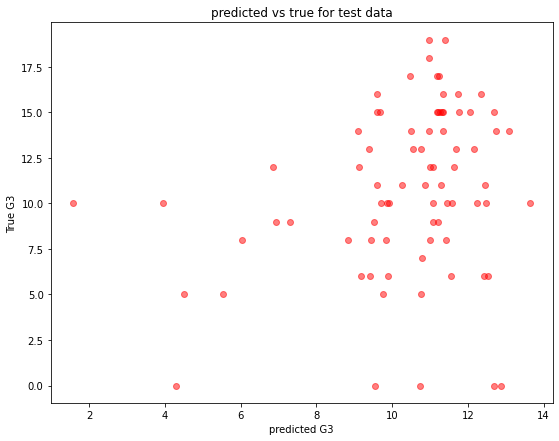

In [48]:
# Get predictions for the test data
y_pred_test_2 = model2.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_2, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.show();

In [49]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences",  "romantic", "higher",  "failures", "studytime", "age", "sex"]
#"Mjob_teacher", "goout","famsup",
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              277.6
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   3.38e-129
Time:                        10:50:16   Log-Likelihood:                         -900.72
No. Observations:                 316   AIC:                                      1815.
Df Residuals:                     309   BIC:                                      1842.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test_2)):.4}')
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 4.515
root mean squared error on test data: 4.298


In [0]:
#@title Texto de título predeterminado


**RANDOM FOREST**

In [0]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Check how many columns our dataset has...
print(f"Number of features =  {X_train.shape[1]}")
num_features = X_train.shape[1]

Number of features =  9


In [0]:
#Creamos función de random forest
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    regressor = sklearn_regressor(**model_parameters)
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    regressor.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    training_score = regressor.score(X_train, y_train)
    testing_score = regressor.score(X_test, y_test)
    
    # Print the results!
    print(f"Train score: {training_score:>5.4f}")
    print(f"Test score: {testing_score:>7.4f}")
    if print_oob_score:
        print(f"OOB score: {regressor.oob_score_:>8.4f}")
        
    return regressor

In [54]:
# Definimos los parametros 
#Prueba 1 --> max_depth':[1,3,7,10,15]
#Prueba 2 --> tras probar con max_depth 7,10 y 15, pasamos a probar con 1,3, y 7.
#Prueba 3 --> tras 1,3 y 7 a 1,2,3
#Prueba 4 --> tras 1,2 y 3 a 1,2
parameters = {'max_depth':[1,2,3], 
#               'max_features': ['sqrt', 5, 10],
              'n_estimators': [50,100,200]}
# initialize model
rf_regressor= RandomForestRegressor(n_jobs=-1, random_state=42)
# initialize grid search and fit
regressor = GridSearchCV(rf_regressor, parameters)
regressor.fit(X_train, y_train)

regressor.best_estimator_.get_params()


#parameters = {"oob_score": True, 
#              "n_estimators": 50, 
#              "max_features": num_features, 
#              'random_state': 42}

#trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
#                                          X_train=X_train, 
#                                          y_train=y_train, 
#                                          X_test=X_test, 
#                                          y_test=y_test, 
#                                          model_parameters=parameters,
#                                          print_oob_score=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [0]:
# Indicamos el mejor parametro
parameters = regressor.best_estimator_.get_params()


In [56]:
#pasamos el mejor parametro al random forest
trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters,
                                          print_oob_score=False)

Train score: 0.3746
Test score:  0.1638


In [0]:
# Comprobamos los valores reales y las predicciones
def plot_y_yhat_scatter(y_actual,y_predicted,train_test):
    ax = sns.regplot(x=y_actual, y=y_predicted, fit_reg=False)
    ax.set_xlabel('true values')
    ax.set_ylabel('predicted values')
    ax.set_title('Relationship between true and predicted loan amounts: '+train_test+' results')
    pass

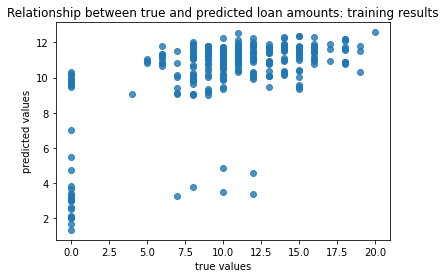

In [58]:
#dataset de entrenamiento
plot_y_yhat_scatter(y_train, trained_regressor.predict(X_train),train_test="training")

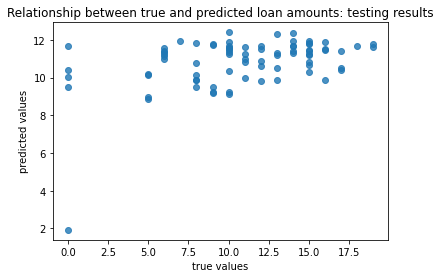

In [59]:
#dataset de test
plot_y_yhat_scatter(y_test, trained_regressor.predict(X_test),train_test="testing")

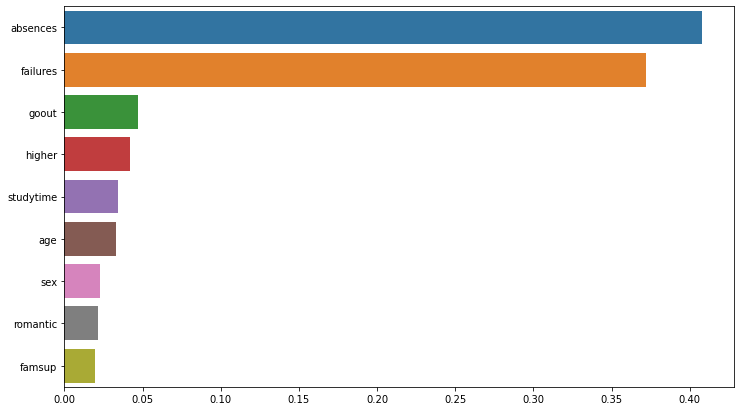

In [60]:
#@title Texto de título predeterminado
#Comprobamos las variables más importantes
# Get the feature importances from our final trained model...
importances = trained_regressor.feature_importances_

# Find the indices of the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting a bar chart of feature importances in descending order
plt.figure(figsize=(12,7))
sns.barplot(y=X_train.columns[indices],
            x=importances[indices]);

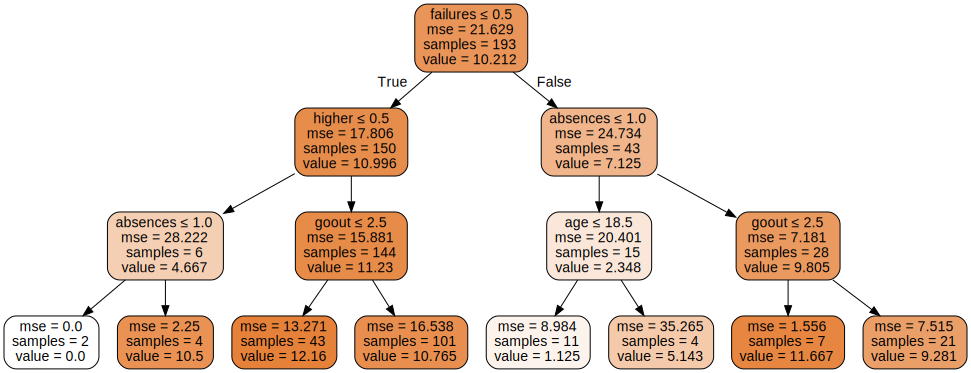

In [61]:
#Visualizar cada corte
import graphviz 
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor 
# from the sklearn tree library, create image of trained decision tree
dot_data = tree.export_graphviz(trained_regressor.estimators_[1], out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=y_train.values, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
#estimator = model.estimators_[5] 
# use graphviz to render the image 
graph = graphviz.Source(dot_data) 
graph

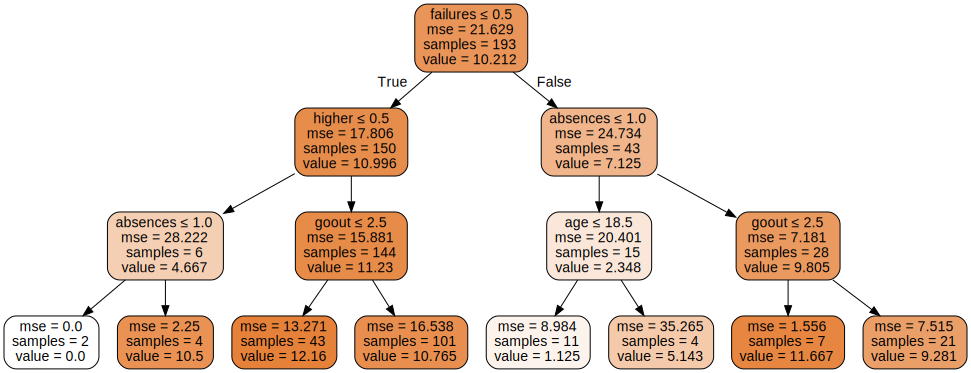

In [62]:
dot_data = tree.export_graphviz(trained_regressor.estimators_[1], out_file=None, 
                                feature_names=X_test.columns, 
                                class_names=y_test.values, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
#estimator = model.estimators_[5] 
# use graphviz to render the image 
graph = graphviz.Source(dot_data) 
graph

**CLUSTERING**

In [0]:
#Kmeans

#Cogemos dos variables
#x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
x_columns = ["G3", "goout",'Medu']
column_1 = 'G3'
#column_2 = 'goout'
column_2 = 'Medu'

df_mat_kmeans = df_mat_one_hot[x_columns]


kmeans = KMeans(n_clusters=3) # Seleccionamos dos clusters
kmeans.fit(df_mat_kmeans);

#añadimos etiquetas

df_mat_kmeans['kmeans_labels'] = kmeans.labels_



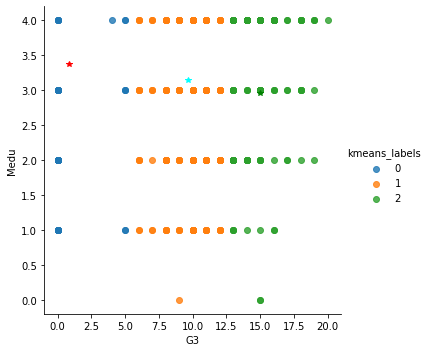

In [64]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                       y=column_2, 
                       data=df_mat_kmeans, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='green', marker='*');

In [0]:
#Elbow
k_values = range(1, 10)

k_mean_models = [KMeans(n_clusters=i) for i in k_values]

scores = [-k_mean_models[i].fit(df_mat_kmeans).score(df_mat_kmeans) 
              for i, model in enumerate(k_mean_models)] 

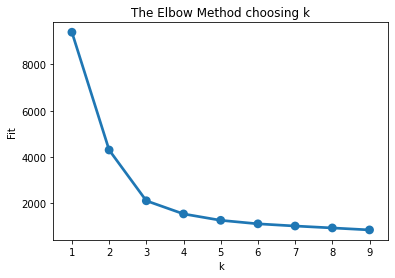

In [66]:
#Visualiamos Elbow para ver el número de clusters
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

In [67]:
#UNIMOS grupo de test y entramiento
x = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
y

array([12, 14,  0,  9,  8,  7, 14,  0, 12, 15,  0, 13,  9, 11, 10,  0,  8,
       10, 18, 19, 14, 12, 13,  6, 10, 10,  8, 10,  8,  9,  0,  7,  5, 11,
        5, 10, 18,  8,  8, 16, 10, 12,  8, 11, 16, 11, 12, 13,  0,  0,  8,
       12, 10, 13,  0, 18, 15,  0, 11, 18, 12, 10, 13, 10, 16, 10, 11, 15,
       11, 11, 14,  0,  9,  8,  6, 11, 11, 13, 10, 14, 10,  8,  7,  6, 11,
       17,  6, 16, 13, 15, 13, 16, 10,  9,  8, 12, 15,  0, 13,  6,  8, 10,
       12, 11,  8, 12,  0, 12,  6,  0, 10,  0, 15, 10, 14,  8,  6, 11, 13,
        8, 18, 11, 12, 10, 11, 13, 13, 11, 17,  9, 13, 15,  9, 10, 10, 11,
        7,  8,  0, 12, 10, 10,  0, 10, 11, 16,  9, 11, 11, 15, 14, 14, 12,
       17, 13, 11,  9, 11, 10, 11, 15, 16, 18,  9,  0, 11,  0, 12, 19,  9,
       10, 15, 13,  8,  0, 11, 15, 12, 14,  6, 11,  0, 11, 13, 10,  0, 10,
       13, 12, 14, 12,  9, 12,  8,  7, 12, 10, 10, 13,  8,  5, 15,  0,  8,
       16, 14, 15, 11, 20, 16, 11, 16, 13, 15, 15, 14, 18, 14,  0, 15, 12,
        9,  0,  0, 19, 10

In [68]:
 np.unique(y)

n_classes = np.unique(y).size
n_classes

18

In [0]:
x = StandardScaler().fit_transform(x)



In [0]:
RANDOM_STATE = n_classes

#Calculamos PCA
pca = PCA(n_components=0.90, random_state=RANDOM_STATE).fit(x)
X_pca = pca.transform(x)

In [71]:
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

X_pca.shape

We need 8 components to explain 90% of variance


(395, 8)

In [72]:
#vemos los componentes
for i in range(0, pca.n_components_):
  print("Componente %d"% i, "= %f" % pca.explained_variance_ratio_[i])

Componente 0 = 0.203241
Componente 1 = 0.159477
Componente 2 = 0.110807
Componente 3 = 0.106939
Componente 4 = 0.105710
Componente 5 = 0.091976
Componente 6 = 0.080866
Componente 7 = 0.073546


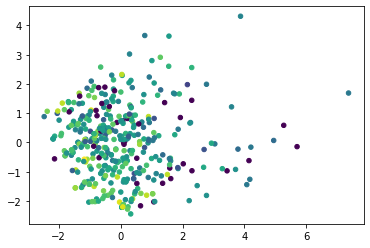

In [73]:
#Ponemos en gráfico la explicación de los dos primeros componentes.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');

In [0]:
#aplicamos kmeans con los componentes anteriores
kmeans = KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE, n_jobs=1)
kmeans.fit(X_pca);
cluster_labels = kmeans.labels_

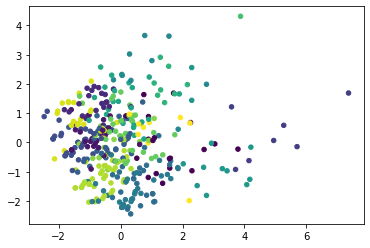

In [75]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  
            cmap='viridis');

In [76]:
#Inertia
 inertia = []
 for k in tqdm_notebook(range(1, n_classes + 1)):
   kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE, n_jobs=1).fit(X_pca)
   inertia.append(np.sqrt(kmeans.inertia_))

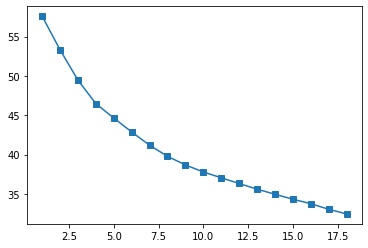

In [77]:
#visualizamos Inertia
plt.plot(range(1,n_classes+1), inertia, marker='s')


In [0]:
#aplicamos kmeans con los componentes anteriores
kmeans = KMeans(n_clusters=5, n_init=100, random_state=RANDOM_STATE, n_jobs=1)
kmeans.fit(X_pca)
preds = kmeans.fit_predict(X_pca)
cluster_labels = kmeans.labels_



In [79]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.45798705e-03 -1.35720537e+00  1.03210638e-02  2.02418426e-01
  -4.24021343e-01  1.23749513e-01 -1.66530614e-01 -1.93297667e-01]
 [-9.52318289e-04  9.27878794e-01  3.23966471e-01  2.07355374e-01
  -2.23422278e-01 -1.01194959e+00  2.46303105e-01 -1.84025285e-01]
 [ 1.46096262e+00  3.13312398e-01 -9.33494746e-01  1.07350013e-01
   6.54925420e-01  7.06535132e-01  8.95851619e-01 -7.86308595e-01]
 [ 3.76108969e+00  2.84402131e-02  9.16552596e-01 -8.13570592e-02
   1.71113595e+00 -1.44403700e-02 -1.35452014e+00  1.63873089e+00]
 [-1.01751553e+00  2.33495270e-01 -1.94882179e-01 -3.79698490e-01
   1.09588408e-01  6.21849746e-01 -1.08148414e-01  2.85042757e-01]]


In [80]:
silhouette_score(X_pca,preds)

0.1799821359059518

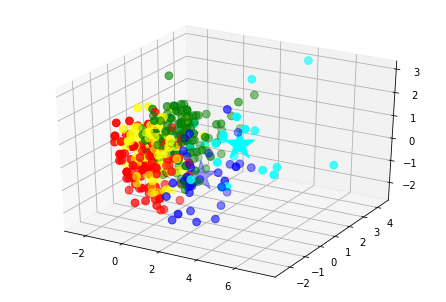

In [81]:
# Predicting the clusters
labels = kmeans.predict(X_pca)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
#'blue','cyan','yellow','black','brown','magenta']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

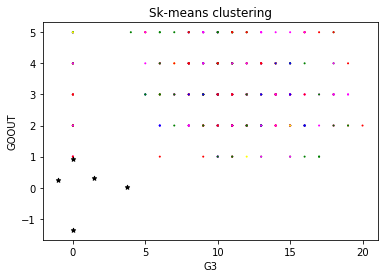

In [82]:
#%% Plot k-means clustering.
x = df_mat_kmeans['G3'].values
y = df_mat_kmeans['goout'].values

colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('G3')
plt.ylabel('GOOUT')
plt.title('Sk-means clustering')
plt.show()

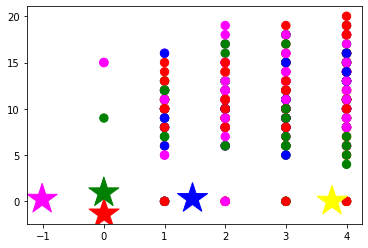

In [83]:
# Getting the values and plotting it
f1 = df_mat_kmeans['Medu'].values
f2 = df_mat_kmeans['G3'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [84]:
copy =  pd.DataFrame()
copy['usuario']=df_mat_kmeans['goout'].values
copy['G3']=df_mat_kmeans['G3'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,106
1,green,112
2,blue,34
3,yellow,20
4,fuchsia,123


In [85]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['G3']=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
diversidadGrupo['cantidad']=group_referrals.groupby('G3').size()
diversidadGrupo

,G3,cantidad
0,0,11.0
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,2.0
6,6,5.0
7,7,2.0
8,8,13.0
9,9,9.0


In [86]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_pca)
closest

array([ 24, 310, 190, 193, 254])

In [87]:
X.iloc[closest]

,absences,goout,romantic,higher,famsup,failures,studytime,age,sex
24,2,2,0,1,1,0,3,15,1
310,0,4,1,1,0,1,2,19,1
190,10,3,0,1,0,0,2,16,1
193,8,2,0,1,1,0,1,16,0
254,0,2,0,1,0,0,1,17,0


In [88]:

y[closest]



array([2, 4, 3, 2, 2])

In [89]:
y[200]

5

In [90]:
X.iloc[200]

absences      2
goout         5
romantic      0
higher        1
famsup        1
failures      0
studytime     2
age          16
sex           1
Name: 200, dtype: int64

In [91]:
#Comprobamos un usuario a que grupo al que pertenece
X_new = np.array([X_pca[200]])

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


In [92]:
X_pca

array([[ 0.21746945, -0.62511775,  0.9058383 , ..., -1.78122437,
         0.23796931,  0.03650097],
       [ 0.24072253, -2.1992039 ,  0.39966026, ..., -0.15344175,
         0.37751232, -0.02358055],
       [ 1.92919725,  0.85203725, -0.92906609, ..., -0.75845157,
         3.07041281,  0.51030831],
       ...,
       [-0.15490787, -0.64539103,  1.61289743, ..., -1.47104746,
         0.37266732,  0.39716013],
       [-1.81377949,  1.11946593,  0.90267017, ..., -1.16000687,
         0.34775316,  0.4637905 ],
       [ 2.69558035, -0.24024864, -2.42378975, ...,  1.15779435,
         1.26508374, -0.80364133]])

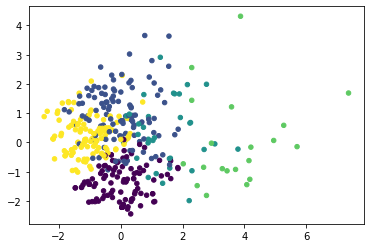

In [93]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  
            cmap='viridis');

In [94]:
nuevo = pd.DataFrame(y)
nuevo.columns = ["G3"]
nuevo


,G3
0,4
1,3
2,2
3,2
4,2
...,...
390,4
391,5
392,3
393,1


In [95]:
pca = PCA(n_components=2, random_state=RANDOM_STATE).fit(x)
NUEVO_X_pca = pca.transform(x)

ValueError: ignored

In [0]:
principalDf = pd.DataFrame(data = NUEVO_X_pca
             , columns = ['P1', 'P2'])
finalDf = pd.concat([principalDf, nuevo], axis = 1)
finalDf

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('P1', fontsize = 15)
ax.set_ylabel('P2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 11, 20]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['G3'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'P1']
               , finalDf.loc[indicesToKeep, 'P2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
# Plot k-means
kmeans_plot = sns.lmplot(x=X_pca[:, 0], 
                       y="G3", 
                       data=df_mat_kmeans, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
#kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
#kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

In [98]:
# Definimos nueva variable objetivo indicando si se aprueba o no

df_mat_one_hot.loc[df_mat_one_hot['G3'] >= 10, 'Aprobar'] = 1 
df_mat_one_hot.loc[df_mat_one_hot['G3'] < 10, 'Aprobar'] = 0 
df_mat_one_hot

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,Aprobar
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10,1,0,0,0,0,1,0,0,0,0,0,0,1,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10,0,1,0,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,0,0,1,0,0,0,1,0,1,0,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,16,0,0,1,0,0,0,1,0,1,0,0,0,1,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,10,0,0,1,0,0,1,0,0,1,0,0,0,1,1


In [160]:

y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["goout", "Medu"]
columnas_estudio = ["goout", "Medu","G3"]
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#UNIMOS grupo de test y entramiento
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
df_mat_clasif = df_mat_one_hot[columnas_estudio]
X.shape

(395, 2)

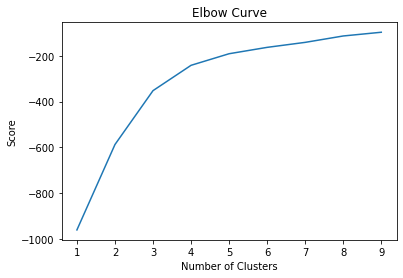

In [162]:
#elbow
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [163]:
#kmeans para clasificacion aprobar

kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.34545455 1.61818182]
 [2.46575342 3.56849315]
 [4.4047619  3.57142857]
 [2.35454545 1.6       ]]


In [164]:
df_mat_clasif

,goout,Medu,G3
0,4,4,6
1,3,1,6
2,2,1,10
3,2,4,15
4,2,3,10
...,...,...,...
390,4,2,9
391,5,3,16
392,3,1,7
393,1,3,10


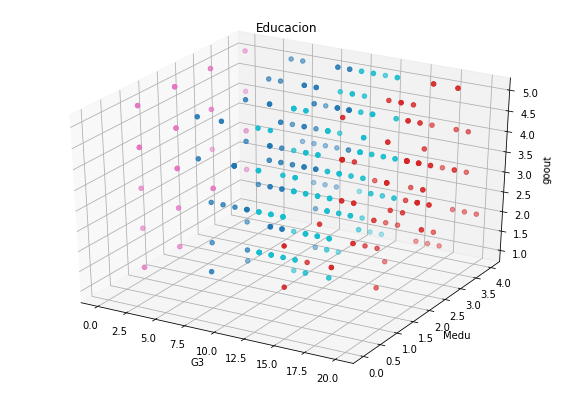

In [168]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_mat_clasif['G3'], df_mat_clasif['Medu'], df_mat_clasif['goout'], c=preds, cmap='tab10')
plt.title('Educacion')
ax.set_xlabel('G3')
ax.set_ylabel('Medu')
ax.set_zlabel('goout')
#plt.show()
# for rotate the axes and update.
#for angle in range(0,360): 
#    ax.view_init(90,angle)

plt.show()

In [0]:
copy =  pd.DataFrame()
copy['usuario']=df_mat_clasif['goout'].values
copy['categoria']=df_mat_clasif['G3'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,146
1,green,55
2,blue,110
3,cyan,84


In [143]:
preds = kmeans.fit_predict(df_mat_clasif)
silhouette_score(df_mat_clasif, preds)

0.38737494658952104

In [144]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_mat_clasif)
closest

array([ 90,  34, 128,  28])